# Explore FTW dataset

In [9]:
import rasterio
import matplotlib.pyplot as plt
import pathlib as Path
import random
from scipy.ndimage import label
from skimage.color import label2rgb
import numpy as np

## Paths required to visualize the dataset

In [10]:
root_folder = "./data"
countries = [ "india" ]
samples_to_show = 4

## Function to plot the temporal images, and masks

In [11]:
import numpy as np

def print_information(wina, winb, sem2, sem3, inst):
    # Function to print detailed information about the images and masks

    def print_stats(data, name):
        """Print statistics like shape, dtype, range, mean, etc."""
        print(f"{name} Shape: ", data.shape)
        print(f"{name} Dtype: ", data.dtype)
        print(f"{name} Value Range: ", np.min(data), np.max(data))
        print(f"{name} Mean: ", np.mean(data))
        print(f"{name} Standard Deviation: ", np.std(data))
        print(f"{name} Unique Values: ", np.unique(data))
        print(f"{name} NaN or Invalid Values Present: ", np.isnan(data).any())

    # Window A
    print_stats(wina, "Window A")
    # Window B
    print_stats(winb, "Window B")
    
    # Semantic 2-class
    print_stats(sem2, "Semantic 2-class")
    
    # Semantic 3-class
    print_stats(sem3, "Semantic 3-class")
    
    # Instance Class
    print_stats(inst, "Instance Class")
    


def plot_data(window_a_file, window_b_file, semantic_2_class_file, semantic_3_class_file, instance_class_file):
    # Load window A and window B
    with rasterio.open(window_a_file) as src:
        window_a = src.read()[0:3, :, :]  # Reading first 3 bands
        window_a = window_a.transpose(1, 2, 0) / 3000  # Normalizing
    
    with rasterio.open(window_b_file) as src:
        window_b = src.read()[0:3, :, :]  # Reading first 3 bands
        window_b = window_b.transpose(1, 2, 0) / 3000  # Normalizing

    # Load semantic and instance data
    with rasterio.open(semantic_2_class_file) as src:
        semantic_2_class = src.read()

    with rasterio.open(semantic_3_class_file) as src:
        semantic_3_class = src.read()

    with rasterio.open(instance_class_file) as src:
        instance_class = src.read()[0]  # Assuming it's single band data for instance labels

        # Generate random colors for each instance class
        unique_labels = np.unique(instance_class)
        colors = [(np.random.rand(), np.random.rand(), np.random.rand()) for _ in unique_labels]
        instance_mask_rgb = label2rgb(instance_class, bg_label=0, bg_color=(0, 0, 0), colors=colors)

    # Print detailed information about the images and masks
    print_information(window_a, window_b, semantic_2_class, semantic_3_class, instance_class)

    # Create subplots to visualize the data
    fig, axs = plt.subplots(1, 5, figsize=(20, 10))
    
    # Display Window A
    axs[0].imshow(np.clip(window_a, 0, 1))  # Clipping to avoid over-scaling issues
    axs[0].set_title('Window A')
    
    # Display Window B
    axs[1].imshow(np.clip(window_b, 0, 1))  # Clipping to avoid over-scaling issues
    axs[1].set_title('Window B')
    
    # Display Semantic 2-class
    axs[2].imshow(semantic_2_class[0], cmap='viridis', vmin=0, vmax=2)
    axs[2].set_title('Semantic 2-class')
    
    # Display Semantic 3-class
    axs[3].imshow(semantic_3_class[0], cmap='viridis', vmin=0, vmax=2)
    axs[3].set_title('Semantic 3-class')
    
    # Display Instance class with RGB mask
    axs[4].imshow(instance_mask_rgb)
    axs[4].set_title('Instance class')

    for ax in axs:
        ax.axis('off')

    # Display the plot
    plt.show()

## Process all the countries mentioned

Processing india
Processing data\india\label_masks\semantic_2class\g0_0004.tif, data\india\label_masks\semantic_3class\g0_0004.tif, data\india\label_masks\instance\g0_0004.tif, data\india\s2_images\window_a\g0_0004.tif, data\india\s2_images\window_b\g0_0004.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.05633333333333333 0.587
Window A Mean:  0.20666272989908854
Window A Standard Deviation:  0.0710420202782106
Window A Unique Values:  [0.05633333 0.058      0.05833333 ... 0.57966667 0.58633333 0.587     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.07533333333333334 0.934
Window B Mean:  0.32390665859646267
Window B Standard Deviation:  0.11158948583836155
Window B Unique Values:  [0.07533333 0.076      0.07633333 ... 0.90566667 0.91566667 0.934     ]
Window B NaN or Invalid Values Present:  False
Semantic 2-class Shape:  (1, 256, 256)
Semantic 2-class Dtype:  uint8

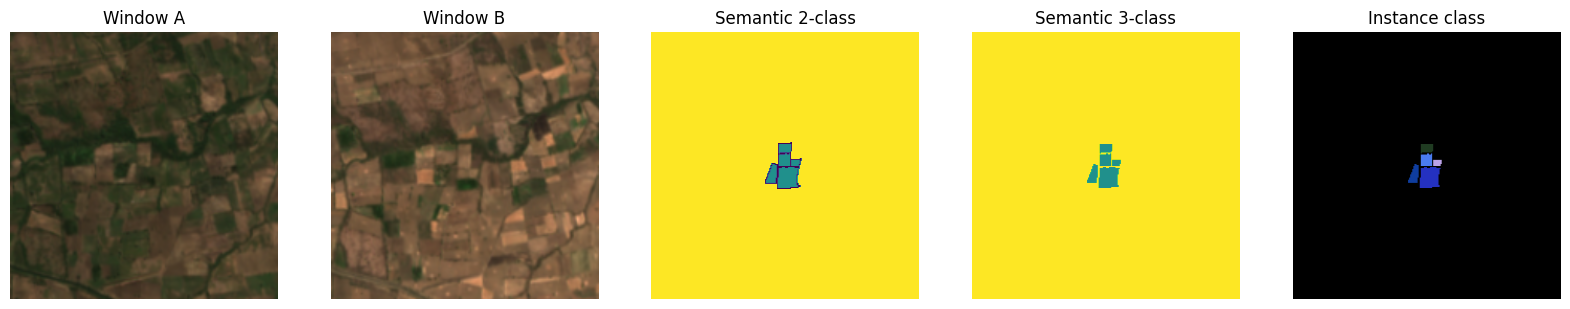

Processing data\india\label_masks\semantic_2class\g0_0012.tif, data\india\label_masks\semantic_3class\g0_0012.tif, data\india\label_masks\instance\g0_0012.tif, data\india\s2_images\window_a\g0_0012.tif, data\india\s2_images\window_b\g0_0012.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.04933333333333333 0.6476666666666666
Window A Mean:  0.24276003519694012
Window A Standard Deviation:  0.09173777537971253
Window A Unique Values:  [0.04933333 0.05       0.051      ... 0.63833333 0.64066667 0.64766667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.15 0.8333333333333334
Window B Mean:  0.33710260857476126
Window B Standard Deviation:  0.09595699961175604
Window B Unique Values:  [0.15       0.152      0.153      ... 0.831      0.83133333 0.83333333]
Window B NaN or Invalid Values Present:  False
Semantic 2-class Shape:  (1, 256, 256)
Semantic 2-class Dtype:  uint8
Sema

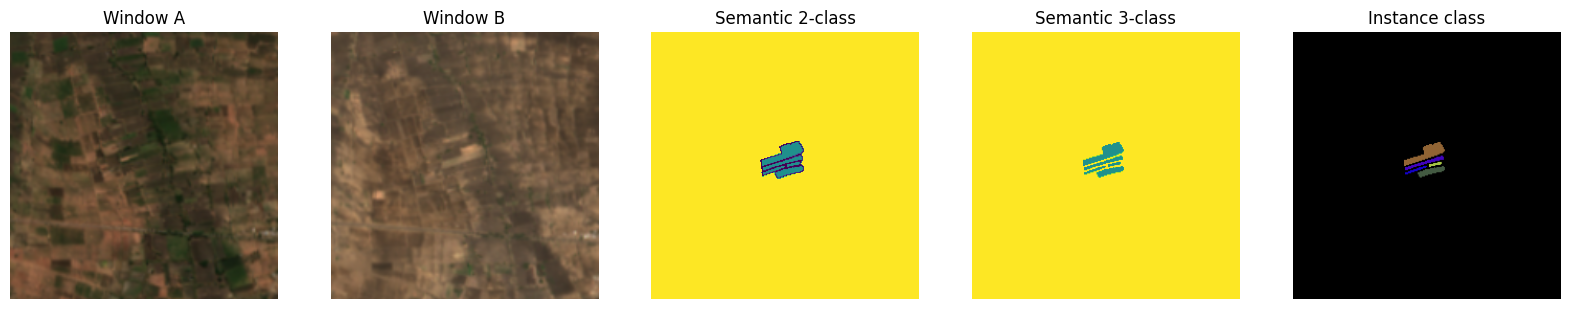

Processing data\india\label_masks\semantic_2class\g0_0014.tif, data\india\label_masks\semantic_3class\g0_0014.tif, data\india\label_masks\instance\g0_0014.tif, data\india\s2_images\window_a\g0_0014.tif, data\india\s2_images\window_b\g0_0014.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.06666666666666667 0.4696666666666667
Window A Mean:  0.17999905056423615
Window A Standard Deviation:  0.05179144966544433
Window A Unique Values:  [0.06666667 0.067      0.068      ... 0.46433333 0.466      0.46966667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.206 0.8463333333333334
Window B Mean:  0.3652096388075086
Window B Standard Deviation:  0.08636012069321607
Window B Unique Values:  [0.206      0.20666667 0.20766667 ... 0.82766667 0.84033333 0.84633333]
Window B NaN or Invalid Values Present:  False
Semantic 2-class Shape:  (1, 256, 256)
Semantic 2-class Dtype:  uint8
Sema

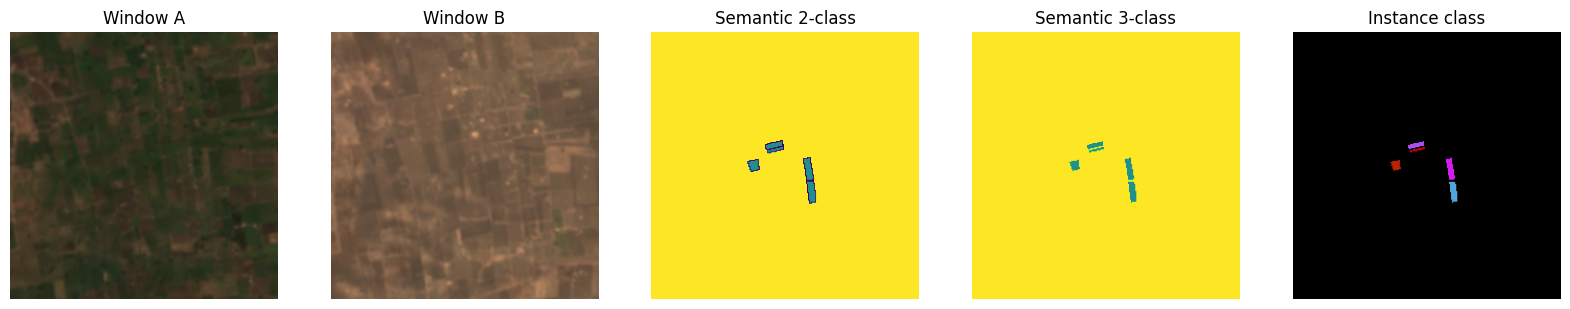

Processing data\india\label_masks\semantic_2class\g0_0019.tif, data\india\label_masks\semantic_3class\g0_0019.tif, data\india\label_masks\instance\g0_0019.tif, data\india\s2_images\window_a\g0_0019.tif, data\india\s2_images\window_b\g0_0019.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.07466666666666667 1.3096666666666668
Window A Mean:  0.5002571394178602
Window A Standard Deviation:  0.23093831459634923
Window A Unique Values:  [0.07466667 0.075      0.07533333 ... 1.30066667 1.305      1.30966667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.17633333333333334 1.1966666666666668
Window B Mean:  0.5488178609212239
Window B Standard Deviation:  0.20903616239506084
Window B Unique Values:  [0.17633333 0.17666667 0.178      ... 1.193      1.19366667 1.19666667]
Window B NaN or Invalid Values Present:  False
Semantic 2-class Shape:  (1, 256, 256)
Semantic 2-class Dtype

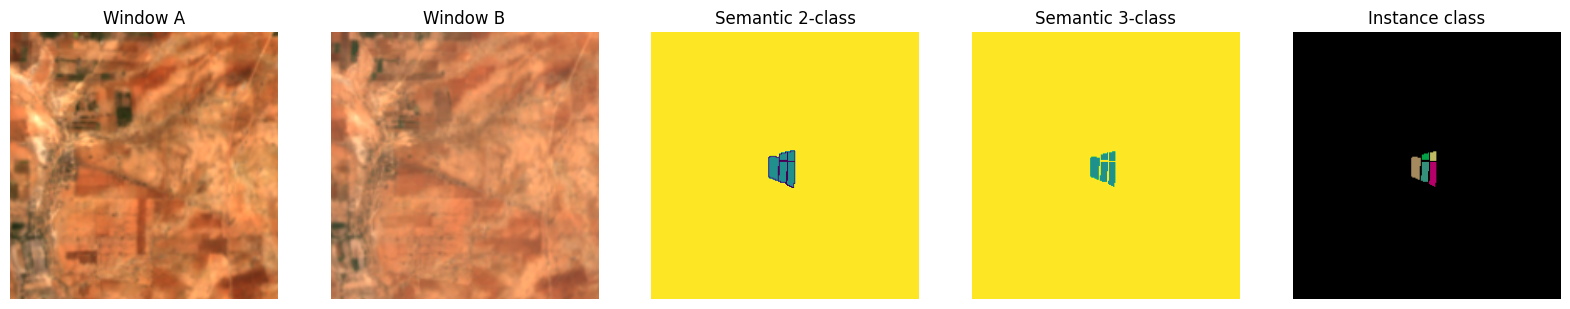

: 

In [ ]:
for country in countries:
    print(f"Processing {country}")
    window_a_folder = Path.Path(root_folder) / country / "s2_images" / "window_a"
    window_b_folder = Path.Path(root_folder) / country / "s2_images" / "window_b"
    label_masks_2_class = Path.Path(root_folder) / country / "label_masks" / "semantic_2class"
    label_masks_3_class = Path.Path(root_folder) / country / "label_masks" / "semantic_3class"
    label_masks_instance = Path.Path(root_folder) / country / "label_masks" / "instance"

    semantic_2_class_files = list(label_masks_2_class.glob("*.tif"))
    semantic_2_class_files = semantic_2_class_files[:samples_to_show]
    
    semantic_3_class_files = []
    instance_files = []
    window_a_files = []
    window_b_files = []
    
    for semantic_2_class_file in semantic_2_class_files:
        semantic_3_class_files.append(label_masks_3_class / semantic_2_class_file.name)
        instance_files.append(label_masks_instance / semantic_2_class_file.name)
        window_a_files.append(window_a_folder / semantic_2_class_file.name)
        window_b_files.append(window_b_folder / semantic_2_class_file.name)

    for semantic_2_class_file, semantic_3_class_file, instance_file, window_a_file, window_b_file in zip(semantic_2_class_files, semantic_3_class_files, instance_files, window_a_files, window_b_files):
        print(f"Processing {semantic_2_class_file}, {semantic_3_class_file}, {instance_file}, {window_a_file}, {window_b_file}")
        plot_data(window_a_file, window_b_file, semantic_2_class_file, semantic_3_class_file, instance_file)

